In [41]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [42]:
airline = "american"

In [43]:
df = pd.read_csv("american.csv")
df.head()

,Year,Month,Passengers,avg_arr_delay_per_flight_min,Consumption,Cost,Freight,Trends
0,2015,1,"69,47,198",12.776814,"1,99,989","3,51,122","1,47,042",67
1,2015,2,"62,16,284",11.586710,"1,77,015","3,09,871","1,51,704",70
2,2015,3,"75,07,133",11.815441,"2,07,126","3,70,033","1,75,370",72
3,2015,4,"73,59,251",12.982691,"2,03,506","3,52,803","1,63,522",68
4,2015,5,"74,81,877",13.305891,"2,12,416","3,97,242","1,71,077",73


In [ ]:
# Convert everything to string, remove commas
df = df.applymap(lambda x: str(x).replace(",", ""))

# Now convert columns from 3rd onward to float
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df['Year'] = pd.to_datetime(df['Year'], format= "%Y")
df['Month'] = pd.to_datetime(df['Month'], format= "%m")
df.iloc[:,2:] = df.iloc[:,2:].astype(float)
    #Year,Month,Stockprice omitted
x = df.iloc[:,2:]
    #standardize
standard = StandardScaler()
x = standard.fit_transform(x)
    #Index
pca = PCA(n_components=1)
pca.fit(x)
sensitivity_index = pca.transform(x)
print(sensitivity_index)

[[-1.9460216 ]
 [-2.28340416]
 [-1.49557851]
 [-1.68920796]
 [-1.34616121]
 [-1.06984088]
 [ 1.12181204]
 [ 0.81752359]
 [-0.14185918]
 [ 0.37333646]
 [-0.13221431]
 [ 0.49690287]
 [-1.29868308]
 [-1.53424998]
 [-0.53345626]
 [-0.97495821]
 [-0.40649401]
 [ 0.28869022]
 [ 0.59343219]
 [-0.06639689]
 [-1.10949223]
 [-0.82443754]
 [-1.31044779]
 [-0.6642755 ]
 [ 0.08623096]
 [-0.68782301]
 [ 0.92411329]
 [ 1.08717207]
 [ 1.18174146]
 [ 1.97513999]
 [ 2.04990124]
 [ 1.49713091]
 [ 0.13692574]
 [ 0.98454287]
 [ 0.03676876]
 [ 0.8301181 ]
 [ 0.47899359]
 [ 0.21523424]
 [ 1.27824587]
 [ 1.00430408]
 [ 1.81735428]
 [ 2.17910651]
 [ 2.51500135]
 [ 2.06520612]
 [ 1.04676405]
 [ 1.41408981]
 [ 0.29926272]
 [ 0.58104909]
 [ 0.23411259]
 [ 0.09235074]
 [ 1.35921528]
 [ 0.89275474]
 [ 1.89959425]
 [ 1.9926839 ]
 [ 1.95506577]
 [ 1.68995043]
 [ 0.64094054]
 [ 0.88487659]
 [ 0.03825863]
 [ 0.66767529]
 [ 0.01224805]
 [-0.58456366]
 [-2.61289751]
 [-6.75925681]
 [-6.31362711]
 [-5.47270646]
 [-4.73469

/var/folders/52/5f__721d2gsbnkm_q6cvchyh0000gn/T/ipykernel_15422/2529379686.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(",", ""))


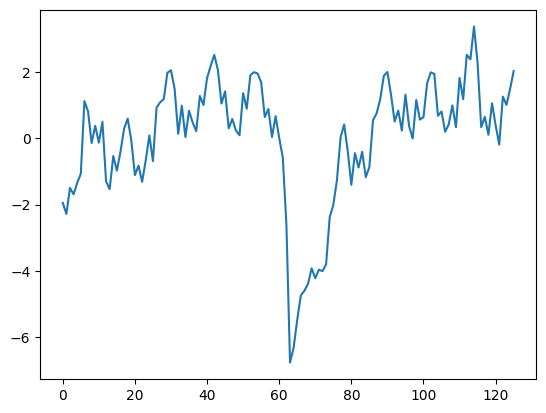

In [45]:
import matplotlib.pyplot as plt
plt.plot(sensitivity_index)

In [46]:
loadings = np.sqrt(pca.explained_variance_) * pca.components_.T
loadings_df = pd.DataFrame(loadings, columns = ["PC1"], index= df.columns[2:])
loadings_df.round(3)

,PC1
Passengers,0.952
avg_arr_delay_per_flight_min,0.687
Consumption,0.939
Cost,0.769
Freight,0.591
Trends,0.593


In [47]:
pca.explained_variance_ratio_

array([0.58709254])

In [48]:
stock = pd.read_csv('aal.csv')
stock.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/15,49.08,54.28,56.20,48.10,276.82M,-8.48%
1,01/02/15,47.90,48.58,52.20,45.95,208.34M,-2.40%
2,01/03/15,52.78,48.20,56.05,46.47,396.78M,10.19%
3,01/04/15,48.28,51.10,53.47,46.88,235.68M,-8.52%
4,01/05/15,42.37,48.65,50.30,41.32,256.70M,-12.25%


In [49]:
len(sensitivity_index)

126

In [50]:
sensitivity_index

array([[-1.9460216 ],
       [-2.28340416],
       [-1.49557851],
       [-1.68920796],
       [-1.34616121],
       [-1.06984088],
       [ 1.12181204],
       [ 0.81752359],
       [-0.14185918],
       [ 0.37333646],
       [-0.13221431],
       [ 0.49690287],
       [-1.29868308],
       [-1.53424998],
       [-0.53345626],
       [-0.97495821],
       [-0.40649401],
       [ 0.28869022],
       [ 0.59343219],
       [-0.06639689],
       [-1.10949223],
       [-0.82443754],
       [-1.31044779],
       [-0.6642755 ],
       [ 0.08623096],
       [-0.68782301],
       [ 0.92411329],
       [ 1.08717207],
       [ 1.18174146],
       [ 1.97513999],
       [ 2.04990124],
       [ 1.49713091],
       [ 0.13692574],
       [ 0.98454287],
       [ 0.03676876],
       [ 0.8301181 ],
       [ 0.47899359],
       [ 0.21523424],
       [ 1.27824587],
       [ 1.00430408],
       [ 1.81735428],
       [ 2.17910651],
       [ 2.51500135],
       [ 2.06520612],
       [ 1.04676405],
       [ 1

In [51]:
len(stock['Price'])

126

In [52]:
len(stock['Date'])

126

In [53]:
df = pd.DataFrame({"Date":stock['Date'],"Price":stock['Price'],"SI":np.array(sensitivity_index).ravel()})
df

,Date,Price,SI
0,01/01/15,49.08,-1.946022
1,01/02/15,47.90,-2.283404
2,01/03/15,52.78,-1.495579
3,01/04/15,48.28,-1.689208
4,01/05/15,42.37,-1.346161
...,...,...,...
121,01/02/25,14.35,-0.189836
122,01/03/25,10.55,1.257077
123,01/04/25,9.95,1.006841
124,01/05/25,11.41,1.483842


In [54]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Create a sequential index (since dates repeat pattern yearly)
# Option 1: Use sequential numbering
df['seq_index'] = range(len(df))

# For decomposition, use sequential index with period=12 (12 days per year)
ts = pd.Series(df['Price'].values, index=df['seq_index'])

/var/folders/52/5f__721d2gsbnkm_q6cvchyh0000gn/T/ipykernel_15422/2841843176.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [55]:
df.head()

,Date,Price,SI,seq_index
0,2015-01-01,49.08,-1.946022,0
1,2015-01-02,47.90,-2.283404,1
2,2015-01-03,52.78,-1.495579,2
3,2015-01-04,48.28,-1.689208,3
4,2015-01-05,42.37,-1.346161,4


Plotting original timeseries

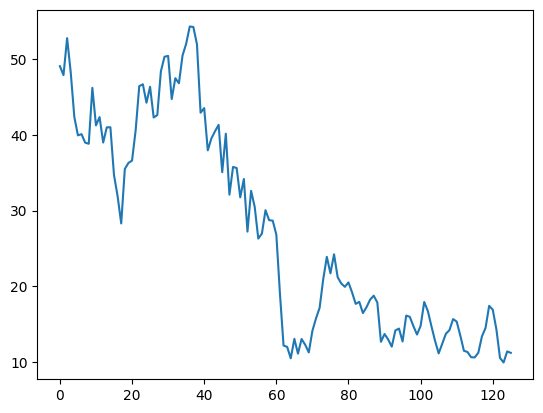

In [56]:
plt.plot(df['seq_index'],df['Price'])

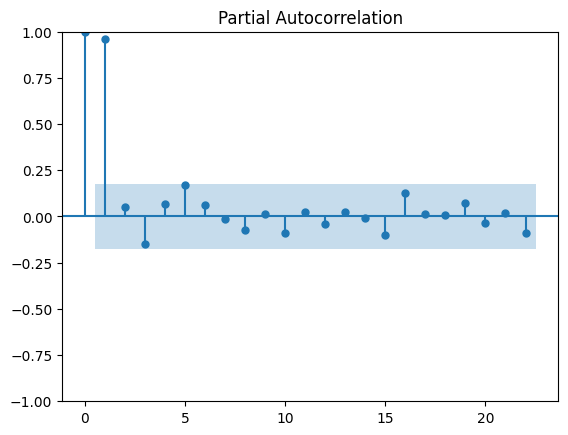

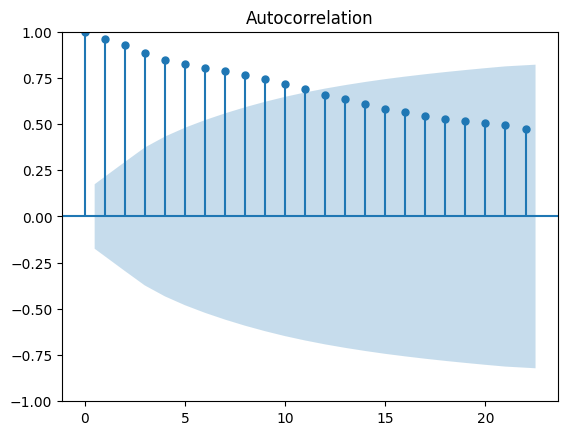

In [57]:
plot_pacf(df['Price'])
plot_acf(df['Price'])
plt.show()


model = multiplicative,
Stock prices show proportional/percentage changes
Volatility typically increases with price level
Returns are multiplicative, not additive

period = 12 since 12 observations per year

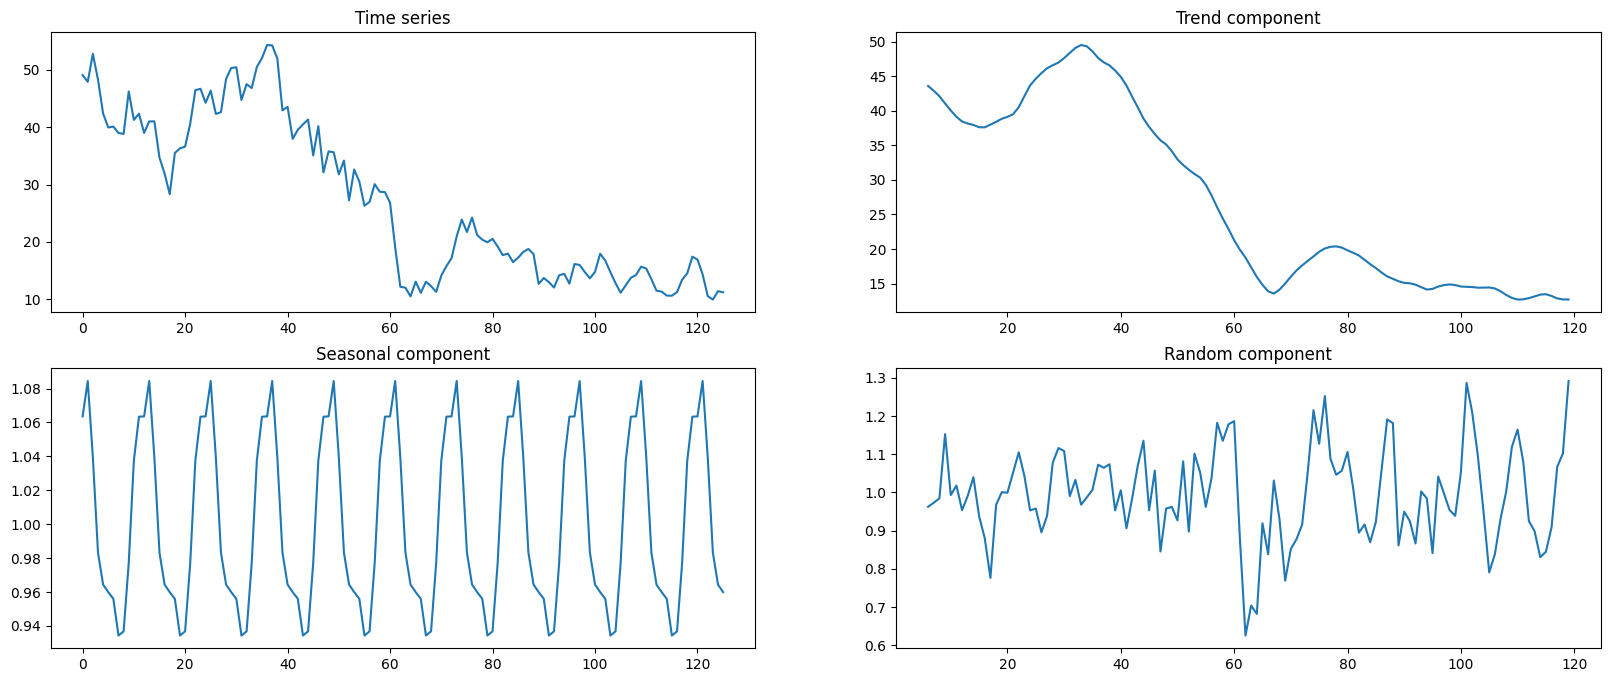

In [58]:
result = seasonal_decompose(ts,model='multiplicative',period=12)
fig,axes = plt.subplots(2,2,figsize = (20,8))   
axes[0,0].plot(df['Price'])
axes[0,0].set_title('Time series')
axes[1,0].plot(result.seasonal)
axes[1,0].set_title('Seasonal component')
axes[0,1].plot(result.trend)
axes[0,1].set_title('Trend component')
axes[1,1].plot(result.resid)
axes[1,1].set_title('Random component')
plt.show()

Stationarity check

In [59]:
ad_fuller_result = adfuller(df['Price'])
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-1.4637719721087905
p-val:0.551350697072616


In ADF test, H0: ts is non stationary

Since pval > 0.05, it is non-stationary (we fail to reject null hypothesis
)

In [ ]:
ad_fuller_result = adfuller(np.log(df['Price']).diff().dropna())
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-10.7505689494565
p-val:2.6719379765822653e-19


Since pval < 0.05, series becomes stationary after first differencing



Therfore, d = 1

Text(0.5, 1.0, 'First order differencing of Monthly Stock Price of american Airlines')

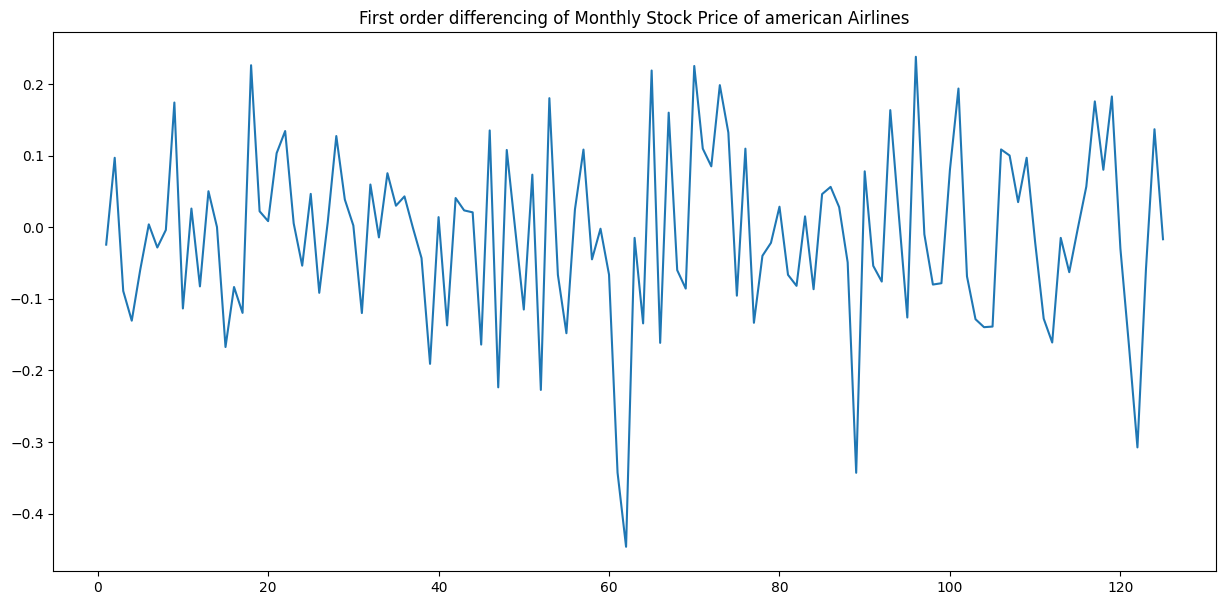

In [61]:
df['log_price'] = np.log(df['Price'])
df['log_price_diff'] = df['log_price'].diff()
plt.figure(figsize=(15,7))
plt.plot(df['log_price_diff'])
plt.title(f"First order differencing of Monthly Stock Price of {airline} Airlines")

Seasonal differencing

In [62]:
df['log_price_diff_seasonal'] = df['log_price_diff'].diff(12)
df = df.dropna().reset_index(drop=True)
df

,Date,Price,SI,seq_index,log_price,log_price_diff,log_price_diff_seasonal
0,2016-01-02,41.00,-1.534250,13,3.713572,0.050267,0.074603
1,2016-01-03,41.01,-0.533456,14,3.713816,0.000244,-0.096773
2,2016-01-04,34.69,-0.974958,15,3.546451,-0.167364,-0.078250
3,2016-01-05,31.91,-0.406494,16,3.462919,-0.083532,0.047045
4,2016-01-06,28.31,0.288690,17,3.343215,-0.119704,-0.060642
...,...,...,...,...,...,...,...
108,2025-01-02,14.35,-0.189836,121,2.663750,-0.164746,-0.261780
109,2025-01-03,10.55,1.257077,122,2.356126,-0.307624,-0.286354
110,2025-01-04,9.95,1.006841,123,2.297573,-0.058553,0.069132
111,2025-01-05,11.41,1.483842,124,2.434490,0.136918,0.298001


Text(0.5, 1.0, 'First order differencing and Seaonal differencing of Monthly Stock Price of american Airlines')

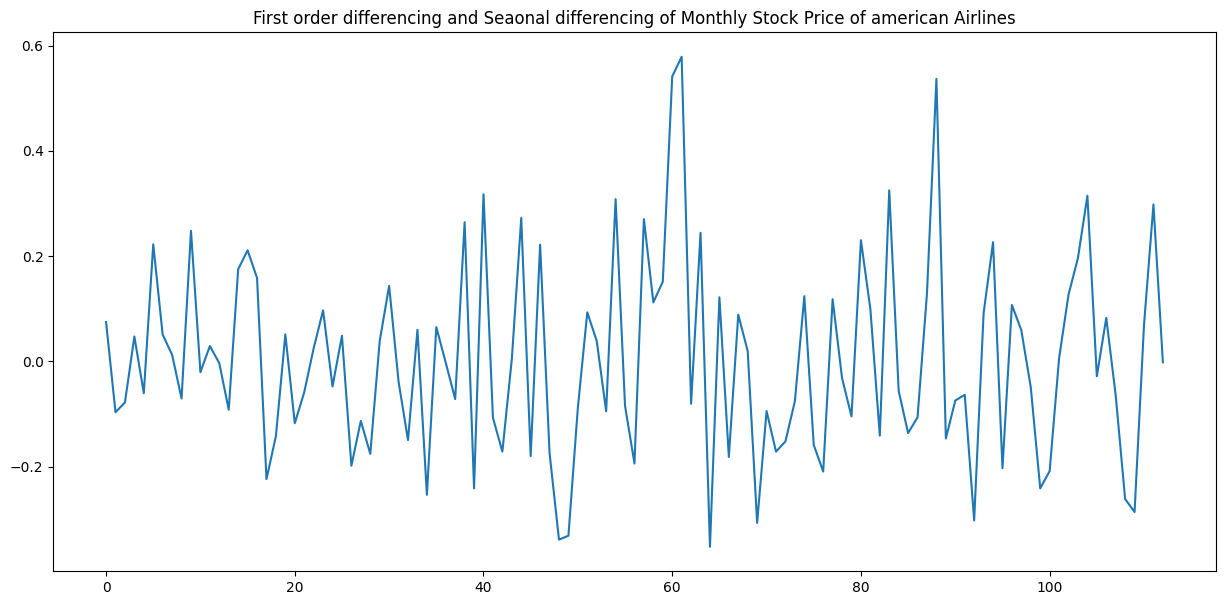

In [63]:
plt.figure(figsize=(15,7))
plt.plot(df['log_price_diff_seasonal'])
plt.title(f"First order differencing and Seaonal differencing of Monthly Stock Price of {airline} Airlines")

In [64]:
ad_fuller_result = adfuller(df['log_price_diff_seasonal'])
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-3.9198655482353315
p-val:0.0018934156720153898


D = 1

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.notebook import tqdm
import pandas as pd

def optimize_SARIMAX(parameters_list, d, D, s, endog, exog=None):
    """
    Return a DataFrame with parameters and their corresponding AIC values.
    
    parameters_list : list of tuples
        List containing (p, q, P, Q) combinations.
    d : int
        Non-seasonal differencing order.
    D : int
        Seasonal differencing order.
    s : int
        Length of the seasonal cycle.
    endog : array-like
        The target variable (time series you want to forecast).
    exog : array-like, optional
        Exogenous variable(s), if any.
    """
    
    results = []
    
    for param in tqdm(parameters_list):
        try:
            model = SARIMAX(
                endog,
                exog=exog,
                order=(param[0], d, param[1]),
                seasonal_order=(param[2], D, param[3], s),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)
            
            results.append({
                '(p,q)x(P,Q)': param,
                'AIC': model.aic
            })
        except Exception:
            continue
    
    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df


In [66]:
import itertools

# Define ranges for parameters
p = q = P = Q = range(0, 3)
D = 1
d = 1
parameters = list(itertools.product(p, q, P, Q))

# Suppose your target variable is df['Price'] and exogenous variable is df['SI']
result_table = optimize_SARIMAX(parameters, d=1, D=1, s=12, endog=df['Price'], exog=df[['SI']])

# Display best parameters
print(result_table.head())


  0%|          | 0/81 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

    (p,q)x(P,Q)         AIC
0  (2, 2, 0, 2)  357.749388
1  (2, 2, 1, 2)  359.494686
2  (1, 2, 0, 2)  360.874199
3  (0, 2, 1, 2)  361.485891
4  (0, 2, 0, 2)  362.614985


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [67]:
best_model = SARIMAX(
    endog=df['Price'], 
    exog=df[['SI']], 
    order=(2, 1, 0),
    seasonal_order=(2, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(best_model.summary())


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74248D+00    |proj g|=  7.57724D-02

At iterate    5    f=  1.63465D+00    |proj g|=  3.82818D-02

At iterate   10    f=  1.63039D+00    |proj g|=  5.24649D-03

At iterate   15    f=  1.63001D+00    |proj g|=  1.79948D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     16     20      1     0     0   1.420D-05   1.630D+00
  F =   1.6300103622723410     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
        

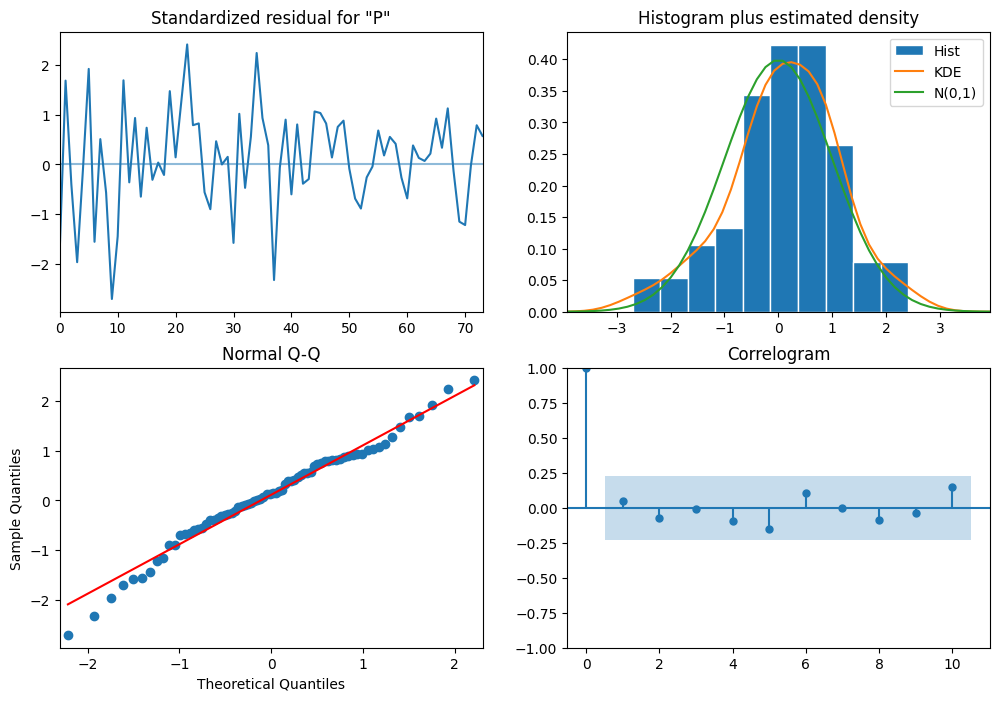

In [68]:
best_model.plot_diagnostics(figsize=(12,8))
plt.show()


In [69]:
from pmdarima import auto_arima

si_model = auto_arima(df['SI'], seasonal=True, m=12, trace=True)
si_model.fit(df['SI'])  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=473.599, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=271.625, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=369.952, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=471.773, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=288.571, Time=0.01 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site

 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=267.665, Time=0.14 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=255.992, Time=0.63 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.21 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.86 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=463.684, Time=0.14 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.76 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=372.812, Time=0.21 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.73 sec


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12]             : AIC=inf, Time=0.63 sec

Best model:  ARIMA(1,0,0)(2,0,1)[12] intercept
Total fit time: 6.586 seconds


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.28562D+00    |proj g|=  3.95611D-01

At iterate    5    f=  1.14787D+00    |proj g|=  1.89666D-02

At iterate   10    f=  1.09512D+00    |proj g|=  4.78776D-02

At iterate   15    f=  1.07991D+00    |proj g|=  8.26699D-02

At iterate   20    f=  1.06169D+00    |proj g|=  1.11024D-02

At iterate   25    f=  1.06073D+00    |proj g|=  3.12980D-03

At iterate   30    f=  1.06007D+00    |proj g|=  1.15976D-02

At iterate   35    f=  1.05978D+00    |proj g|=  1.38311D-03

At iterate   40    f=  1.05978D+00    |proj g|=  1.06500D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

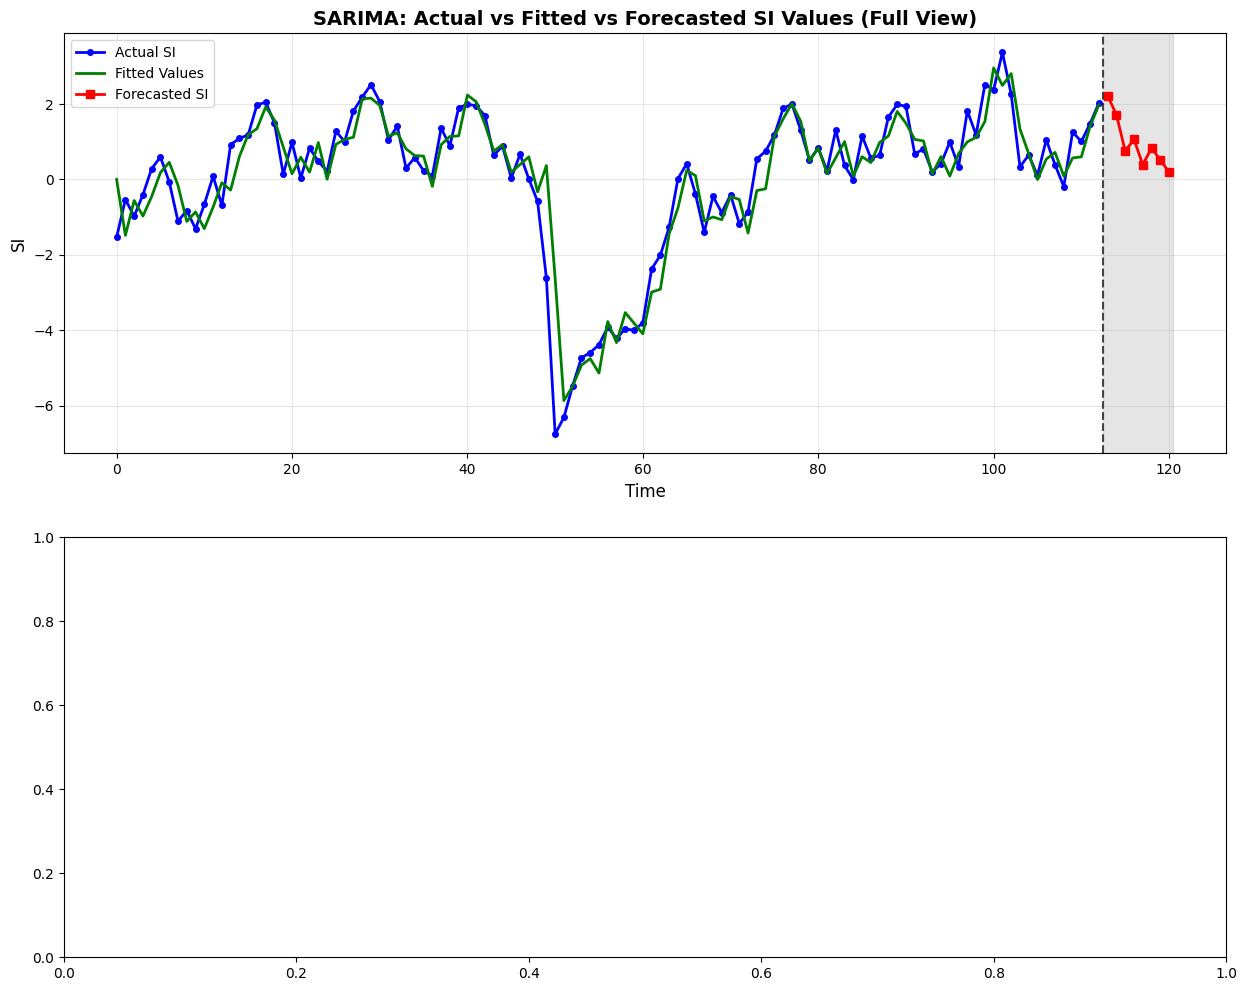

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Get the parameters that auto_arima found
order = si_model.order
seasonal_order = si_model.seasonal_order

# Refit as SARIMA to get access to get_forecast
si_model = SARIMAX(df['SI'], order=order, seasonal_order=seasonal_order).fit()

# Now continue with your plotting code
si_fitted = si_model.fittedvalues
start_idx = len(df) - len(si_fitted)
fitted_index = df.index[start_idx:]
forecast_index = np.arange(len(df), len(df) + 8)

# Forecast SI
si_forecast = si_model.get_forecast(steps=8)
si_forecast_values = si_forecast.predicted_mean.values.reshape(-1, 1)

# Then your plotting code...
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# ===== SUBPLOT 1: Everything together =====
ax1.plot(df.index, df['SI'], label='Actual SI', color='blue', linewidth=2, marker='o', markersize=4)
ax1.plot(fitted_index, si_fitted, label='Fitted Values', color='green', linewidth=2)  # <-- Use fitted_index
ax1.plot(forecast_index, si_forecast_values, label='Forecasted SI', color='red', linewidth=2, marker='s', markersize=6)
ax1.axvspan(len(df) - 0.5, len(df) + 7.5, alpha=0.2, color='grey')
ax1.axvline(x=len(df) - 0.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('SI', fontsize=12)
ax1.set_title('SARIMA: Actual vs Fitted vs Forecasted SI Values (Full View)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10, loc='best')
ax1.grid(True, alpha=0.3)

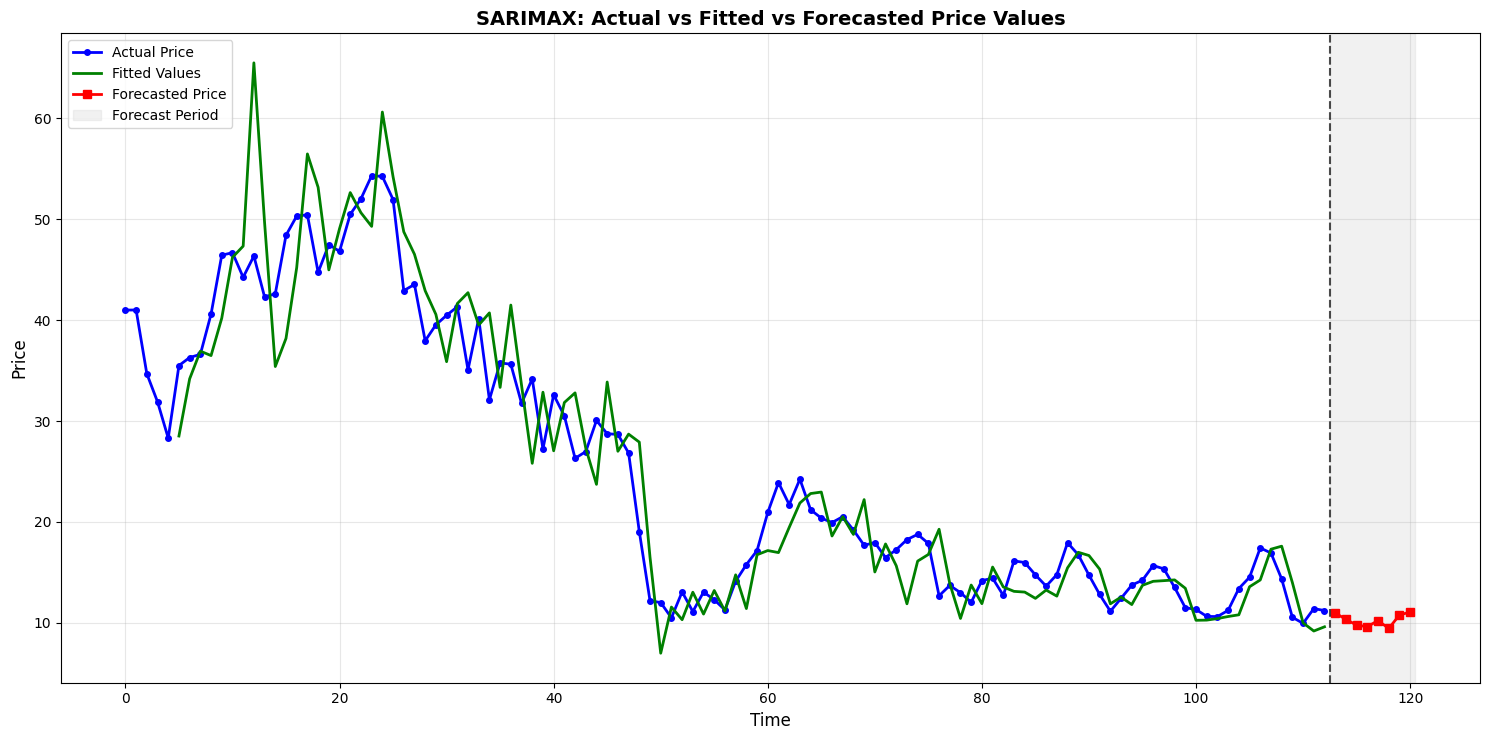


=== Price Forecast Summary ===
Last actual price: 11.22
First forecasted price: 10.98
Last forecasted price: 11.08

Forecasted prices:
  Step 1: 10.98
  Step 2: 10.35
  Step 3: 9.78
  Step 4: 9.62
  Step 5: 10.23
  Step 6: 9.45
  Step 7: 10.77
  Step 8: 11.08


In [71]:
fitted_values = best_model.fittedvalues
# Set first few to NaN for alignment
fitted_values[:5] = np.NaN

# Forecast the next 8 steps
forecast = best_model.get_forecast(steps=8, exog=si_forecast_values)
forecast_mean = forecast.predicted_mean

# Create index for forecast period
forecast_index = np.arange(len(df), len(df) + 8)

plt.figure(figsize=(15, 7.5))
plt.plot(df.index, df['Price'], label='Actual Price', color='blue', linewidth=2, marker='o', markersize=4)
plt.plot(df.index, fitted_values, label='Fitted Values', color='green', linewidth=2)
plt.plot(forecast_index, forecast_mean, label='Forecasted Price', color='red', linewidth=2, marker='s', markersize=6)
plt.axvspan(len(df) - 0.5, len(df) + 7.5, alpha=0.3, color='lightgrey', label='Forecast Period')
plt.axvline(x=len(df) - 0.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('SARIMAX: Actual vs Fitted vs Forecasted Price Values', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print("\n=== Price Forecast Summary ===")
print(f"Last actual price: {df['Price'].iloc[-1]:.2f}")
print(f"First forecasted price: {forecast_mean.iloc[0]:.2f}")
print(f"Last forecasted price: {forecast_mean.iloc[-1]:.2f}")
print(f"\nForecasted prices:")
for i, val in enumerate(forecast_mean, 1):
    print(f"  Step {i}: {val:.2f}")

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# y_true = actual values
# y_pred = model fitted values (in-sample)
y_true = df['Price'][best_model.loglikelihood_burn:]  # skip initial NaNs
y_pred = best_model.fittedvalues[best_model.loglikelihood_burn:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.2f}%")


MAE: 2.305, RMSE: 3.013, MAPE: 13.78%


On an average, the model predictions are off by 2.305 